In [ ]:
import zipfile
file=zipfile.ZipFile('emails.csv.zip')
file.extractall()

In [1]:
import pandas  as pd
df=pd.read_csv('emails.csv')

In [2]:
df.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [3]:
df["message"][0].split("\n") 

['Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>',
 'Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)',
 'From: phillip.allen@enron.com',
 'To: tim.belden@enron.com',
 'Subject: ',
 'Mime-Version: 1.0',
 'Content-Type: text/plain; charset=us-ascii',
 'Content-Transfer-Encoding: 7bit',
 'X-From: Phillip K Allen',
 'X-To: Tim Belden <Tim Belden/Enron@EnronXGate>',
 'X-cc: ',
 'X-bcc: ',
 "X-Folder: \\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail",
 'X-Origin: Allen-P',
 'X-FileName: pallen (Non-Privileged).pst',
 '',
 'Here is our forecast',
 '',
 ' ']

In [4]:
import re
def create_dataframe(series):
    data = []
    for line in series.split('\n'):
        data.append(
            dict(
                re.findall(
                    r"(Message-ID|Date|From|To|Subject|Mime-Version|Content-Type|Content-Transfer-Encoding|X-From|X-To|X-cc|X-bcc|X-Folder|X-Origin|X-FileName)\s*:\s*([^\s]+)", line
                )
            )
        )
        data1={k:v for element in data for k,v in element.items()}
        data1['text']=' '.join(series.split('\n')[15:]).strip()

    return data1

In [5]:
df1 = df['message'].map(create_dataframe)
df_splited = pd.DataFrame.from_records(df1).fillna("")

In [6]:
print(df_splited.shape)

(517401, 16)


In [7]:
df_splited.head()

,Message-ID,Date,From,To,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-Folder,X-Origin,X-FileName,text,Subject,X-cc,X-bcc
0,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon,",phillip.allen@enron.com,tim.belden@enron.com,1.0,text/plain;,7bit,Phillip,Tim,"\Phillip_Allen_Jan2002_1\Allen,",Allen-P,pallen,Here is our forecast,,,
1,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri,",phillip.allen@enron.com,john.lavorato@enron.com,1.0,text/plain;,7bit,Phillip,John,"\Phillip_Allen_Jan2002_1\Allen,",Allen-P,pallen,Traveling to have a business meeting takes the...,Re:,,
2,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed,",phillip.allen@enron.com,leah.arsdall@enron.com,1.0,text/plain;,7bit,Phillip,Leah,\Phillip_Allen_Dec2000\Notes,Allen-P,pallen.nsf,test successful. way to go!!!,Re:,,
3,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon,",phillip.allen@enron.com,randall.gay@enron.com,1.0,text/plain;,7bit,Phillip,Randall,\Phillip_Allen_Dec2000\Notes,Allen-P,pallen.nsf,"Randy, Can you send me a schedule of the sal...",,,
4,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu,",phillip.allen@enron.com,greg.piper@enron.com,1.0,text/plain;,7bit,Phillip,Greg,\Phillip_Allen_Dec2000\Notes,Allen-P,pallen.nsf,Let's shoot for Tuesday at 11:45.,Re:,,


In [8]:
import numpy as np
import re
from nltk.corpus import stopwords
stop = stopwords.words('english')
def tokenizer(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text.lower())
    text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '')
    tokenized = [w for w in text.split() if w not in stop]
    return tokenized

<>:7: SyntaxWarning: invalid escape sequence '\)'
<>:8: SyntaxWarning: invalid escape sequence '\W'
<>:7: SyntaxWarning: invalid escape sequence '\)'
<>:8: SyntaxWarning: invalid escape sequence '\W'
C:\Users\Shabnam\AppData\Local\Temp\ipykernel_5584\2915367723.py:7: SyntaxWarning: invalid escape sequence '\)'
  emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text.lower())
C:\Users\Shabnam\AppData\Local\Temp\ipykernel_5584\2915367723.py:8: SyntaxWarning: invalid escape sequence '\W'
  text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '')


In [9]:
from sklearn.feature_extraction.text import HashingVectorizer
vect = HashingVectorizer(decode_error='ignore', n_features=2**21, preprocessor=None, tokenizer=tokenizer)
X_train = vect.transform(df_splited['text'])

In [10]:
import numpy as np
from sklearn.decomposition import TruncatedSVD 

model = TruncatedSVD(n_components=2, random_state=42)
X_train_r=model.fit_transform(X_train) 

In [12]:
X_train_r.shape

(517401, 2)

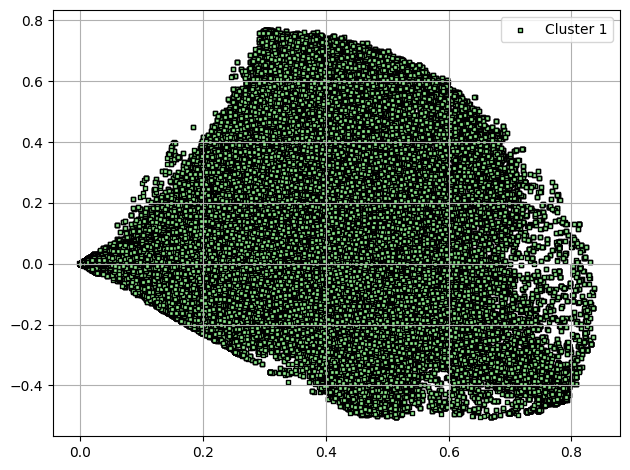

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X_train_r[:, 0], X_train_r[:, 1], s=10, c='lightgreen', marker='s', edgecolor='black', label='Data')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans( n_clusters=2, max_iter=100, n_init=1, random_state=1).fit(X_train_r)
cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
print(f"Number of elements assigned to each cluster: {cluster_sizes}")

Number of elements assigned to each cluster: [421342  96059]


In [20]:
y=KMeans.predict(kmeans, X_train_r)
kmeans.cluster_centers_.shape

(2, 2)

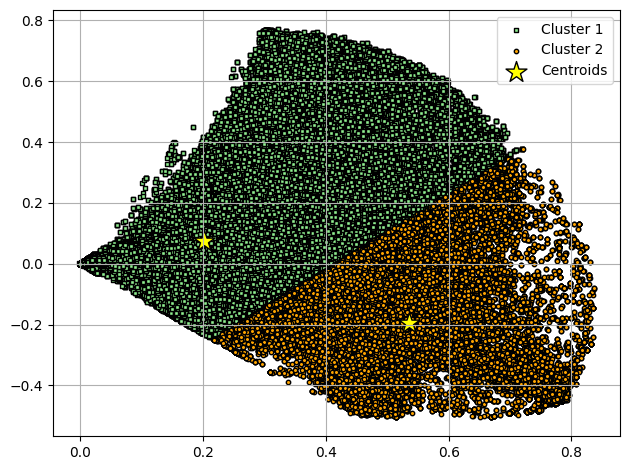

In [21]:
import matplotlib.pyplot as plt
plt.scatter(X_train_r[y == 0, 0], X_train_r[y == 0, 1], s=10, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(X_train_r[y == 1, 0], X_train_r[y == 1, 1], s=10, c='orange', marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, marker='*', c='yellow', edgecolor='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()